In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# импортируем классы TimeSeriesSplit и KFold,
# реализующие стратегии перекрестной проверки
from sklearn.model_selection import (TimeSeriesSplit, 
                                     KFold)

# импортируем классы CatBoostRegressor, Pool
from catboost import CatBoostRegressor, Pool

# импортируем функцию mean_squared_error()
from sklearn.metrics import mean_squared_error

# импортируем вспомогательные функции
from utils import create_calendar_vars, moving_stats

# отключаем экспоненциальное представление
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# импортируем модуль warnings
import warnings

In [2]:
# записываем CSV-файл в объект DataFrame
flat_data = pd.read_csv('Data/Flats_timeseries.csv',
                        sep=';',
                        index_col=['Date_Create'],
                        parse_dates=['Date_Create'],
                        date_parser=lambda col: pd.to_datetime(
                            col, format='%d.%m.%Y'))
flat_data

,Value_abs
Date_Create,
2016-08-22,1450000
2016-08-23,1650000
2016-08-24,2250000
2016-08-25,1960000
2016-08-26,1950000
2016-08-27,1700000
2016-08-28,1550000
2016-08-29,2330000
2016-08-30,1900000


In [3]:
# создаем массив меток и массив признаков
y_flat_data = flat_data.pop('Value_abs')

In [4]:
# создаем экземпляр класса KFold
kfoldcv = KFold(n_splits=3)

# взглянем на индексы наблюдений, попавших в обучающую
# и тестовую выборки, по каждой из 3 итераций
for train_index, test_index in kfoldcv.split(flat_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = (flat_data.iloc[train_index], 
                       flat_data.iloc[test_index])
    y_train, y_test = (y_flat_data.iloc[train_index], 
                       y_flat_data.iloc[test_index])
    print("Общее кол-во наблюдений: %d" % (len(flat_data)))
    print("Обучающая выборка: %d" % (len(X_train)))
    print("Тестовая выборка: %d" % (len(X_test)))
    print("")

TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [0 1 2 3 4 5 6]
Общее кол-во наблюдений: 20
Обучающая выборка: 13
Тестовая выборка: 7

TRAIN: [ 0  1  2  3  4  5  6 14 15 16 17 18 19] TEST: [ 7  8  9 10 11 12 13]
Общее кол-во наблюдений: 20
Обучающая выборка: 13
Тестовая выборка: 7

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14 15 16 17 18 19]
Общее кол-во наблюдений: 20
Обучающая выборка: 14
Тестовая выборка: 6



In [5]:
# создаем экземпляр класса TimeSeriesSplit
expandcv = TimeSeriesSplit(n_splits=3)

# взглянем на индексы наблюдений, попавших в обучающую
# и тестовую выборки, по каждой из 3 итераций
for train_index, test_index in expandcv.split(flat_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = (flat_data.iloc[train_index], 
                       flat_data.iloc[test_index])
    y_train, y_test = (y_flat_data.iloc[train_index], 
                       y_flat_data.iloc[test_index])
    print("Общее кол-во наблюдений: %d" % len(flat_data))
    print("Обучающая выборка: %d" % len(X_train))
    print("Тестовая выборка: %d" % len(X_test))
    print("")

TRAIN: [0 1 2 3 4] TEST: [5 6 7 8 9]
Общее кол-во наблюдений: 20
Обучающая выборка: 5
Тестовая выборка: 5

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13 14]
Общее кол-во наблюдений: 20
Обучающая выборка: 10
Тестовая выборка: 5

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [15 16 17 18 19]
Общее кол-во наблюдений: 20
Обучающая выборка: 15
Тестовая выборка: 5



In [6]:
# создаем экземпляр класса TimeSeriesSplit
expandcv = TimeSeriesSplit(test_size=4, n_splits=3)

# взглянем на индексы наблюдений, попавших в обучающий
# и тестовый наборы, по каждой из 3 итераций
for train_index, test_index in expandcv.split(flat_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = (flat_data.iloc[train_index], 
                       flat_data.iloc[test_index])
    y_train, y_test = (y_flat_data.iloc[train_index], 
                       y_flat_data.iloc[test_index])
    print("Общее кол-во наблюдений: %d" % len(flat_data))
    print("Обучающая выборка: %d" % len(X_train))
    print("Тестовая выборка: %d" % len(X_test))
    print("")

TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10 11]
Общее кол-во наблюдений: 20
Обучающая выборка: 8
Тестовая выборка: 4

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12 13 14 15]
Общее кол-во наблюдений: 20
Обучающая выборка: 12
Тестовая выборка: 4

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [16 17 18 19]
Общее кол-во наблюдений: 20
Обучающая выборка: 16
Тестовая выборка: 4



In [7]:
# загружаем набор о ежемесячных продажах вина в Австралии
wine_data = pd.read_csv('Data/monthly_australian_wine_sales.csv',
                        index_col=['month'],
                        parse_dates=['month'],
                        date_parser=lambda col: pd.to_datetime(
                            col, format='%Y-%m-%d'))

# создаем календарные признаки
wine_data = create_calendar_vars(wine_data)

# создаем массив меток и массив признаков
y_wine_data = wine_data.pop('sales')

# создаем модель CatBoost
ctbst_model = CatBoostRegressor(
    random_seed=42, 
    n_estimators=600,
    learning_rate=0.05,
    loss_function='MAE',
    depth=9,
    logging_level='Silent')

In [8]:
# пишем функцию перекрестной проверки для рядов, которая выводит
# подробную информацию о происходящем внутри цикла перекрестной
# проверки
def timeseries_cv(data, y_data, model, max_train_size=None, test_size=None, 
                  n_splits=3, gap=0, visualize=True, last_n_train=30):
    """
    Выполняет перекрестную проверку расширяющимся/
    скользящим окном без гэпа/с гэпом.
    
    Параметры
    ----------
    X: pandas.DataFrame
        Массив признаков.
    y: pandas.Series
        Массив меток.
    model:
        Модель-регрессор: либо CatBoostRegressor, либо
        класс-регрессор библиотеки sklearn.
    max_train_size: int, по умолчанию None
        Максимальный размер обучающей выборки.
    test_size: int, по умолчанию None
        Максимальный размер тестовой выборки 
        (определяется горизонтом прогнозирования).
    n_splits: int, по умолчанию 3
        Количество разбиений на обучающую 
        и тестовую выборки.
    gap: int, по умолчанию 0
        Размер гэпа.
    visualize: bool, по умолчанию True
        Визуализация прогнозов.
    last_n_train: int, по умолчанию 30
        Вывод n наблюдений обучающей выборки
        при визуализации прогнозов.
    """
    
    # создаем экземпляр класса TimeSeriesSplit
    tscv = TimeSeriesSplit(max_train_size=max_train_size,
                           test_size=test_size,
                           n_splits=n_splits, 
                           gap=gap)

    # создаем пустой список для хранения значений метрики
    rmse_lst = []

    # взглянем на индексы наблюдений, попавших в обучающий
    # и тестовый наборы, по каждой из 3 итераций
    for cnt, (train_index, test_index) in enumerate(tscv.split(data), 1):
        X_train, X_test = (data.iloc[train_index], 
                           data.iloc[test_index])
        y_train, y_test = (y_data.iloc[train_index], 
                           y_data.iloc[test_index])
        print("TRAIN:", [X_train.index[0].strftime('%Y-%m-%d'), 
                         X_train.index[-1].strftime('%Y-%m-%d')], 
              "TEST:", [X_test.index[0].strftime('%Y-%m-%d'), 
                        X_test.index[-1].strftime('%Y-%m-%d')])
        print("Общее кол-во наблюдений: %d" % (len(data)))
        print("Обучающая выборка: %d" % (len(X_train)))
        print("Тестовая выборка: %d" % (len(X_test)))
    
        # если модель - CatBoostRegressor
        if model.__class__.__name__ == 'CatBoostRegressor':
            # создаем массив индексов категориальных 
            # признаков для CatBoost
            categorical_features_indices = np.where(
                X_train.dtypes == object)[0]
            # формируем обучающий пул
            train_pool = Pool(
                X_train, y_train, 
                cat_features=categorical_features_indices)
            # обучаем модель
            model.fit(train_pool)
          
        # в противном случае
        else:
            model.fit(X_train, y_train)
    
        # получаем прогнозы
        predictions = model.predict(X_test)
        predictions = pd.Series(predictions)
        predictions.index = X_test.index
    
        # визуализируем прогнозы   
        if visualize:
            # задаем размер графика
            plt.figure(figsize=(8, 4)) 
            # настраиваем ориентацию меток оси x
            plt.xticks(rotation=90)
            # строим графики для обучающих данных, 
            # тестовых данных, прогнозов модели
            plt.plot(y_train[-last_n_train:], 
                     label='обучающая выборка')
            plt.plot(predictions, color='red', 
                     label='прогнозы')
            plt.plot(y_test, color='green', 
                     label='тестовая выборка')
            # задаем координатную сетку
            plt.grid()
            # задаем легенду
            plt.legend()
            plt.show()
        
        # вычисляем RMSE на тестовой выборке в текущей итерации
        rmse = mean_squared_error(y_test, predictions, squared=False)   
        # добавим найденное в данной итерации значение RMSE в список
        rmse_lst.append(rmse)
        print(f"RMSE={rmse:.3f} на {cnt}-й итерации\n")

    # вычисляем усредненное значение метрики
    mean_rmse = np.mean(rmse_lst)
    print(f"Усредненное значение RMSE={mean_rmse:.3f}")

TRAIN: ['1980-01-01', '1993-02-01'] TEST: ['1993-03-01', '1993-08-01']
Общее кол-во наблюдений: 176
Обучающая выборка: 158
Тестовая выборка: 6


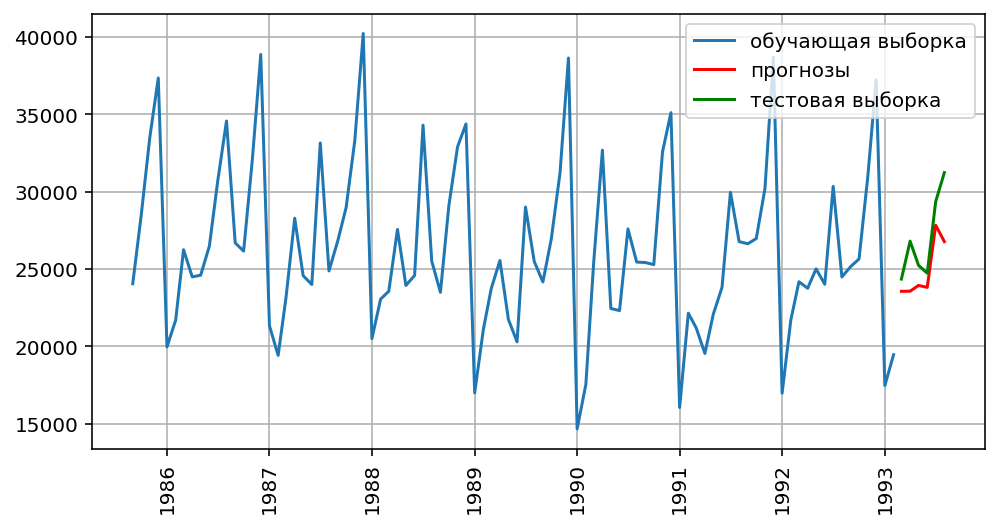

RMSE=2444.249 на 1-й итерации

TRAIN: ['1980-01-01', '1993-08-01'] TEST: ['1993-09-01', '1994-02-01']
Общее кол-во наблюдений: 176
Обучающая выборка: 164
Тестовая выборка: 6


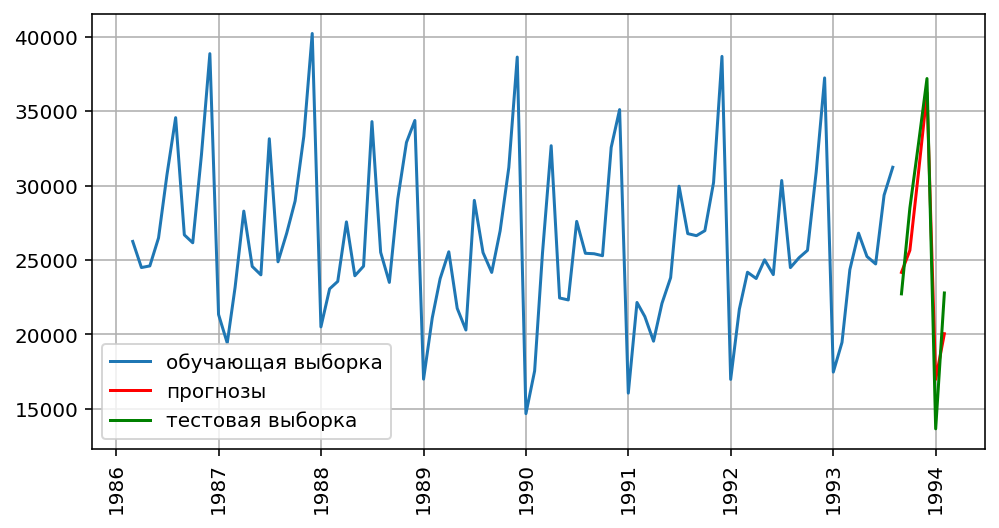

RMSE=2358.360 на 2-й итерации

TRAIN: ['1980-01-01', '1994-02-01'] TEST: ['1994-03-01', '1994-08-01']
Общее кол-во наблюдений: 176
Обучающая выборка: 170
Тестовая выборка: 6


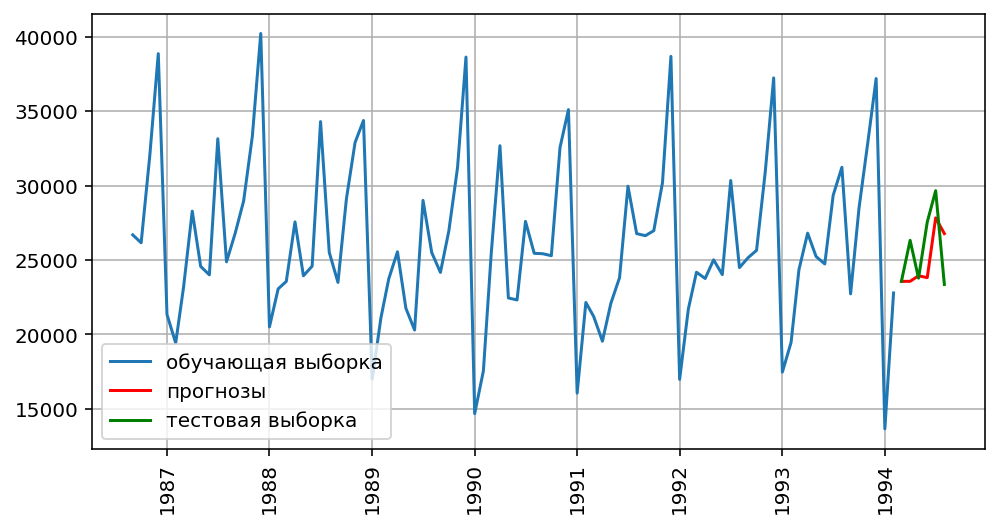

RMSE=2468.700 на 3-й итерации

Усредненное значение RMSE=2423.770


In [9]:
# применяем перекрестную проверку расширяющимся окном
timeseries_cv(wine_data, y_wine_data, ctbst_model, 
              last_n_train=90, test_size=6, 
              n_splits=3, gap=0)

In [10]:
# пишем функцию перекрестной проверки расширяющимся/
# скользящим окном без гэпа/с гэпом
# с формированием лагов и скользящих 
# статистик без протечек
def timeseries_cv_with_lags_and_moving_stats(
    data, y_data, model, lags_range=None, moving_stats_range=None,
    aggfunc='mean', seasonality=1, print_cv_scheme=True,  
    print_features=True, visualize=True, last_n_train=5, 
    max_train_size=None, test_size=None, n_splits=3, 
    gap=0, fillna=None): 
    """
    Выполняет перекрестную проверку расширяющимся/
    скользящим окном без гэпа/с гэпом с 
    формированием лагов и скользящих статистик.
    
    Параметры
    ----------
    data: pandas.DataFrame
        Массив признаков.
    y_data: pandas.Series
        Массив меток.
    model:
        Модель-регрессор: либо CatBoostRegressor, либо
        класс-регрессор библиотеки sklearn.
    lags_range: 
        Диапазон значений, значение - количество 
        периодов для лагов.
    moving_stats_range: 
        Диапазон значений, значение - ширина окна 
        для скользящей статистики.
    aggfunc: string, по умолчанию 'mean'
        Агрегирующая функция для вычисления
        скользящей статистики.
    seasonality: int, по умолчанию 1
        Коэффициент сезонности для скользящей статистики.
    print_cv_scheme: bool, по умолчанию True
        Печать схемы перекрестной проверки.
    print_features: bool, по умолчанию True
        Печать признаков.
    visualize: bool, по умолчанию True
        Визуализация прогнозов.
    last_n_train: int, 5
        Вывод n наблюдений обучающей выборки 
        при визуализации прогнозов.
    n_splits: int, по умолчанию 3
        Количество разбиений на обучающую и тестовую 
        выборки.
    max_train_size: int, по умолчанию None
        Максимальный размер обучающей выборки.
    test_size: int, по умолчанию None
        Максимальный размер тестовой выборки 
        (определяется горизонтом прогнозирования).
    gap: int, по умолчанию 0
        Размер гэпа.   
    fillna: int, по умолчанию 0
        Стратегия импутации пропусков 
        в обучающей выборке.
    """  
    if min(lags_range) < test_size:
        warnings.warn(
            "Количество периодов для лагов задавайте\n" +
            "равным или больше горизонта прогнозирования.")
    
    if min(moving_stats_range) < test_size:
        warnings.warn(
            "Ширину окна для скользящих статистик задавайте\n" + 
            "равной или больше горизонта прогнозирования.")
    
    # создаем экземпляр класса TimeSeriesSplit
    tscv = TimeSeriesSplit(
        max_train_size=max_train_size,
        test_size=test_size, 
        n_splits=n_splits,
        gap=gap)
    
    # создаем пустой список, куда записываем значения RMSE
    rmse_lst = []
        
    # запускаем цикл перекрестной проверки 
    for cnt, (train_index, test_index) in enumerate(
        tscv.split(data), 1):
        X_train, X_test = (data.iloc[train_index], 
                           data.iloc[test_index])          
        y_train, y_test = (y_data.iloc[train_index], 
                           y_data.iloc[test_index])
        
        y_test_N = y_test.copy()
        
        # значения в тестовом массиве меток заменяем NaN
        y_test_N[:] = np.NaN
        # конкатенируем обучающий и тестовый массивы меток
        tmp_target = pd.concat([y_train, y_test_N])     
        
        # конкатенируем обучающий и тестовый 
        # массивы признаков
        concat_data = pd.concat([X_train, X_test])
        
        # печатаем схему валидации и сконкатенированный 
        # массив меток
        if print_cv_scheme:
            print("-------------------------------------")
            print("TRAIN:", 
                  [X_train.index[0].strftime('%Y-%m-%d'), 
                   X_train.index[-1].strftime('%Y-%m-%d')], 
                  "TEST:", 
                  [X_test.index[0].strftime('%Y-%m-%d'), 
                   X_test.index[-1].strftime('%Y-%m-%d')])
            print("\nОбщее кол-во наблюдений: %d" % (
                len(X_train) + len(X_test)))
            print("Обучающий набор: %d" % (len(X_train)))
            print("Тестовый набор: %d" % (len(X_test)))
            
        if print_features:
            print(f"\nЗащита:\n\n{tmp_target}\n")                      
        
        # формируем лаги, количество периодов должно быть
        # равно или превышать значение  горизонта 
        # прогнозирования (если меньше, получим 
        # значения NaN)
        if lags_range is not None:
            for i in lags_range:
                concat_data[f"Lag_{i}"] = tmp_target.shift(i)
                
        # формируем скользящие статистики, ширина окна 
        # должна быть равна или превышать значение 
        # горизонта прогнозирования (если меньше, 
        # получим значения NaN)
        if moving_stats_range is not None:
            for i in moving_stats_range:
                concat_data[f"Moving_{aggfunc}_{i}"] = \
                moving_stats(tmp_target, window=i, aggfunc=aggfunc, 
                             seasonality=seasonality)
        
        # печатаем сконкатенированный массив признаков 
        # с новыми переменными - лагами и скользящими 
        # статистиками
        if print_features:
            pattern = concat_data.columns.str.contains(
                'Lag|Moving_')
            feat = concat_data.columns[pattern]
            print(f"Доб. признаки:\n{concat_data[feat]}\n")
        
        # сортируем столбцы для воспроизводимости 
        # (для CatBoost порядок генерации признаков 
        # влияет на результат)
        concat_data = concat_data.sort_index(axis=1)
        
        # снова выделяем обучающий и тестовый 
        # массивы признаков
        X_train = concat_data[:-test_size]
        X_test = concat_data[-test_size:]
        
        # заполняем пропуски в обучающей выборке
        if fillna == 'zero':
            X_train = X_train.fillna(0, axis=0)
        if fillna == 'mean':
            X_train = X_train.fillna(X_train.mean(), axis=0)
            
        # если модель - CatBoostRegressor
        if model.__class__.__name__ == 'CatBoostRegressor':
            # создаем массив индексов категориальных 
            # признаков для CatBoost
            categorical_features_indices = np.where(
                X_train.dtypes == object)[0]
            # формируем обучающий пул
            train_pool = Pool(
                X_train, y_train, 
                cat_features=categorical_features_indices)
            # обучаем модель
            model.fit(train_pool)
          
        # в противном случае
        else:
            model.fit(X_train, y_train)
        
        # получаем прогнозы 
        predictions = model.predict(X_test)
        predictions = pd.Series(predictions)
        predictions.index = X_test.index
        
        # вычисляем RMSE на тестовой выборке 
        # в текущей итерации
        rmse = mean_squared_error(
            y_test, predictions, squared=False)   
        # добавим найденное в данной итерации 
        # значение RMSE в список
        rmse_lst.append(rmse)
        
        print(f"\nRMSE={rmse:.3f} на {cnt}-й итерации\n")
        
        # визуализируем прогнозы   
        if visualize:
            # задаем размер графика
            plt.figure(figsize=(8, 4))
            # настраиваем ориентацию меток оси x
            plt.xticks(rotation=90)
            # строим графики для обучающих данных, 
            # тестовых данных, прогнозов модели
            plt.plot(y_train.iloc[-last_n_train:], 
                     label='обучающая выборка')
            plt.plot(predictions, 
                     color='red', 
                     label='прогнозы')
            plt.plot(y_test, 
                     color='green', 
                     label='тестовая выборка')
            # задаем координатную сетку
            plt.grid()
            # задаем легенду
            plt.legend()
            plt.show()
        
    # расчет среднего значения RMSE
    rmse_mean = np.mean(rmse_lst)
    # выведем среднее значение RMSE
    print(f"Среднее значение RMSE={rmse_mean:.3f}")
    
    if print_features:
        # печатаем список признаков (порядок генерации 
        # признаков может повлиять на результат CatBoost)
        feat_lst = concat_data.columns.tolist()
        print(f"\nСписок признаков:\n{feat_lst}")

-------------------------------------
TRAIN: ['2016-08-22', '2016-08-29'] TEST: ['2016-08-30', '2016-09-02']

Общее кол-во наблюдений: 12
Обучающий набор: 8
Тестовый набор: 4

Защита:

Date_Create
2016-08-22   1450000.00000
2016-08-23   1650000.00000
2016-08-24   2250000.00000
2016-08-25   1960000.00000
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-28   1550000.00000
2016-08-29   2330000.00000
2016-08-30             NaN
2016-08-31             NaN
2016-09-01             NaN
2016-09-02             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-22            NaN           NaN            NaN            NaN
2016-08-23            NaN           NaN  1450000.00000  1450000.00000
2016-08-24            NaN           NaN  1550000.00000  1550000.00000
2016-08-25            NaN           NaN  1783333.33333  1783333.33333
2016-08-26 

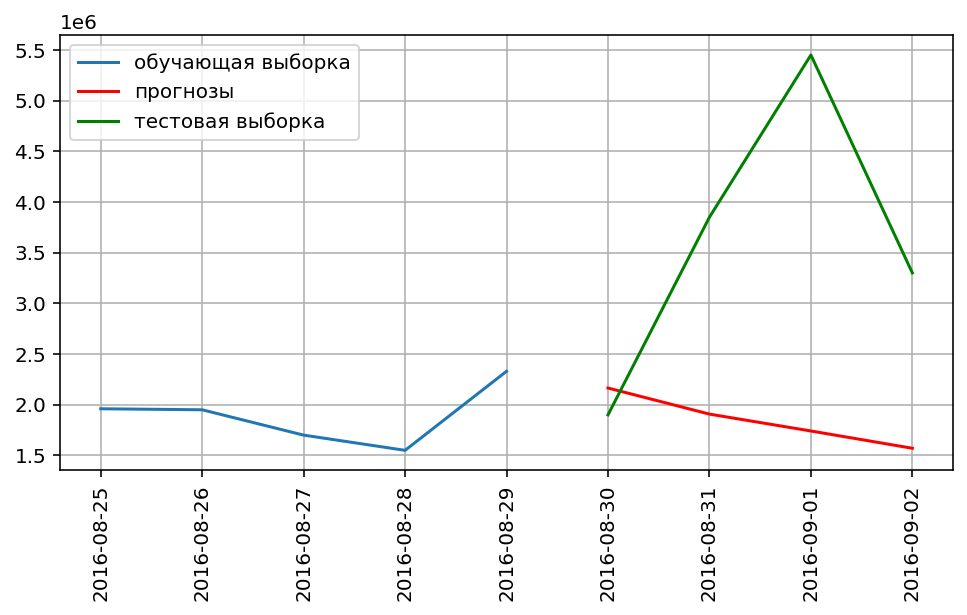

-------------------------------------
TRAIN: ['2016-08-22', '2016-09-02'] TEST: ['2016-09-03', '2016-09-06']

Общее кол-во наблюдений: 16
Обучающий набор: 12
Тестовый набор: 4

Защита:

Date_Create
2016-08-22   1450000.00000
2016-08-23   1650000.00000
2016-08-24   2250000.00000
2016-08-25   1960000.00000
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-28   1550000.00000
2016-08-29   2330000.00000
2016-08-30   1900000.00000
2016-08-31   3850000.00000
2016-09-01   5450000.00000
2016-09-02   3300000.00000
2016-09-03             NaN
2016-09-04             NaN
2016-09-05             NaN
2016-09-06             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-22            NaN           NaN            NaN            NaN
2016-08-23            NaN           NaN  1450000.00000  1450000.00000
2016-08-24            NaN           NaN  1

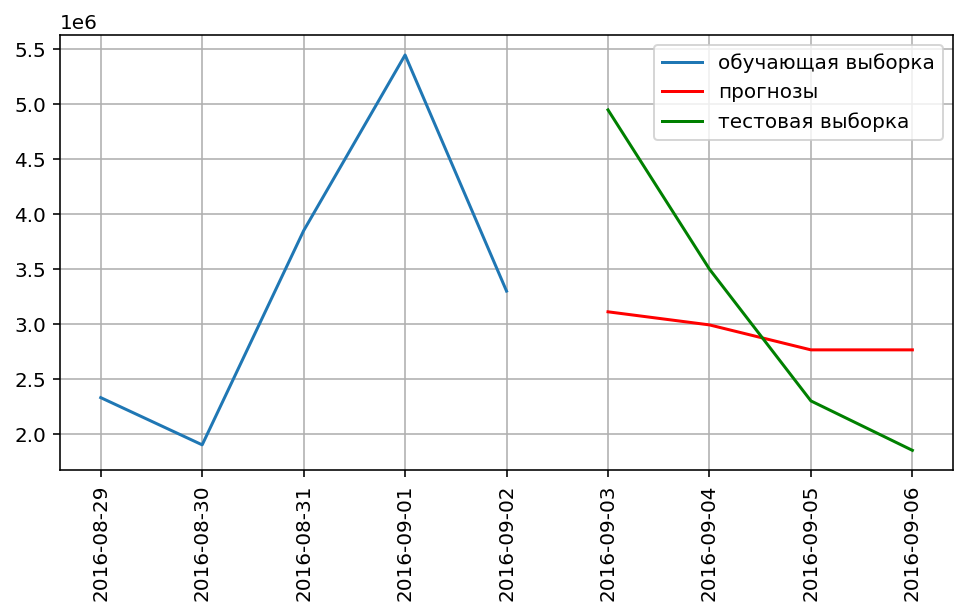

-------------------------------------
TRAIN: ['2016-08-22', '2016-09-06'] TEST: ['2016-09-07', '2016-09-10']

Общее кол-во наблюдений: 20
Обучающий набор: 16
Тестовый набор: 4

Защита:

Date_Create
2016-08-22   1450000.00000
2016-08-23   1650000.00000
2016-08-24   2250000.00000
2016-08-25   1960000.00000
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-28   1550000.00000
2016-08-29   2330000.00000
2016-08-30   1900000.00000
2016-08-31   3850000.00000
2016-09-01   5450000.00000
2016-09-02   3300000.00000
2016-09-03   4950000.00000
2016-09-04   3500000.00000
2016-09-05   2300000.00000
2016-09-06   1850000.00000
2016-09-07             NaN
2016-09-08             NaN
2016-09-09             NaN
2016-09-10             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-22            NaN           NaN            NaN            NaN
2016

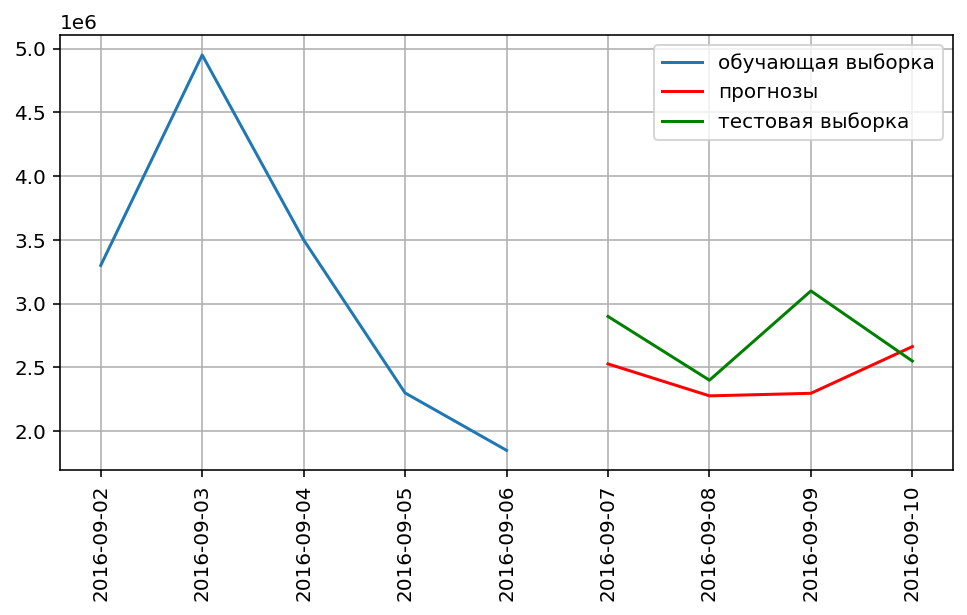

Среднее значение RMSE=1267409.567

Список признаков:
['Lag_4', 'Lag_5', 'Moving_mean_4', 'Moving_mean_5']


In [11]:
# применяем функцию перекрестной проверки расширяющимся
# окном с формированием скользящих статистик и лагов
# на каждой итерации
timeseries_cv_with_lags_and_moving_stats(
    flat_data, y_flat_data, model=ctbst_model,
    lags_range=range(4, 6),  
    moving_stats_range=range(4, 6),
    aggfunc='mean', test_size=4, n_splits=3)

-------------------------------------
TRAIN: ['1980-01-01', '1993-02-01'] TEST: ['1993-03-01', '1993-08-01']

Общее кол-во наблюдений: 164
Обучающий набор: 158
Тестовый набор: 6

RMSE=1755.159 на 1-й итерации



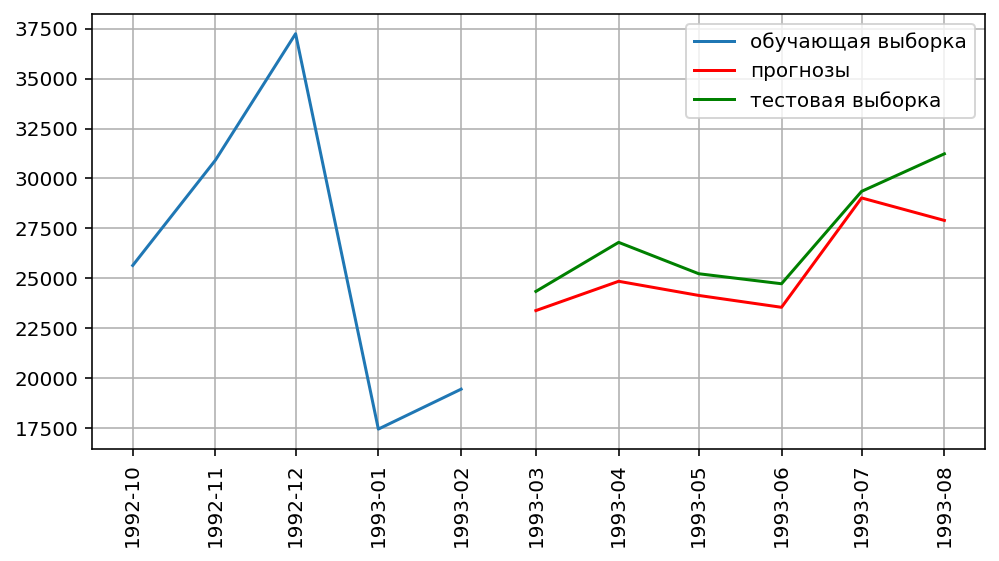

-------------------------------------
TRAIN: ['1980-01-01', '1993-08-01'] TEST: ['1993-09-01', '1994-02-01']

Общее кол-во наблюдений: 170
Обучающий набор: 164
Тестовый набор: 6

RMSE=1915.940 на 2-й итерации



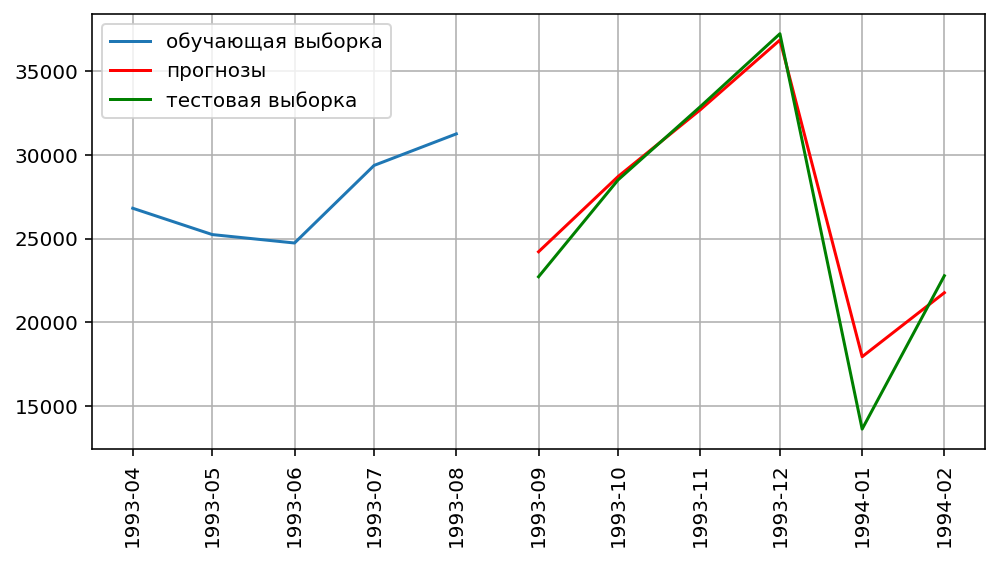

-------------------------------------
TRAIN: ['1980-01-01', '1994-02-01'] TEST: ['1994-03-01', '1994-08-01']

Общее кол-во наблюдений: 176
Обучающий набор: 170
Тестовый набор: 6

RMSE=2335.542 на 3-й итерации



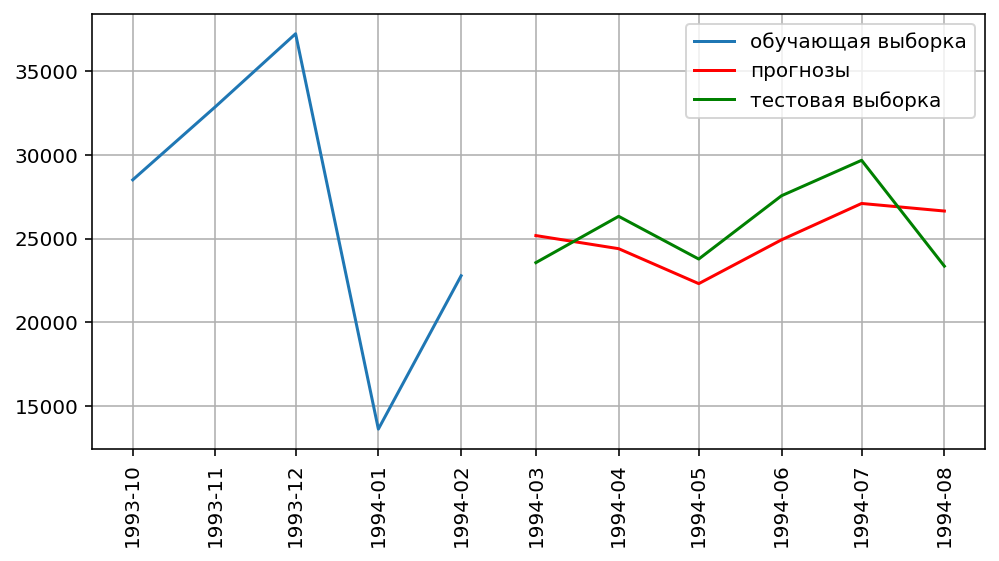

Среднее значение RMSE=2002.214


In [12]:
# применяем функцию перекрестной проверки расширяющимся
# окном с формированием скользящих статистик и лагов
# на каждой итерации
timeseries_cv_with_lags_and_moving_stats(
    wine_data, y_wine_data, model=ctbst_model,
    lags_range=list(range(6, 11, 2)),  
    moving_stats_range=[6, 8],
    print_features=False,
    aggfunc='mean', test_size=6, n_splits=3)

In [13]:
# создаем экземпляр класса TimeSeriesSplit,
# фиксируя максимальный размер обучающей выборки
slidingcv = TimeSeriesSplit(n_splits=3, max_train_size=5, test_size=4)

# взглянем на индексы наблюдений, попавших в обучающую
# и тестовую выборки, по каждой из 3 итераций
for train_index, test_index in slidingcv.split(flat_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = (flat_data.iloc[train_index], 
                       flat_data.iloc[test_index])
    y_train, y_test = (y_flat_data.iloc[train_index], 
                       y_flat_data.iloc[test_index])
    print("Общее кол-во наблюдений: %d" % len(flat_data))
    print("Обучающая выборка: %d" % len(X_train))
    print("Тестовая выборка: %d" % len(X_test))
    print("")

TRAIN: [3 4 5 6 7] TEST: [ 8  9 10 11]
Общее кол-во наблюдений: 20
Обучающая выборка: 5
Тестовая выборка: 4

TRAIN: [ 7  8  9 10 11] TEST: [12 13 14 15]
Общее кол-во наблюдений: 20
Обучающая выборка: 5
Тестовая выборка: 4

TRAIN: [11 12 13 14 15] TEST: [16 17 18 19]
Общее кол-во наблюдений: 20
Обучающая выборка: 5
Тестовая выборка: 4



TRAIN: ['1987-03-01', '1993-02-01'] TEST: ['1993-03-01', '1993-08-01']
Общее кол-во наблюдений: 176
Обучающая выборка: 72
Тестовая выборка: 6


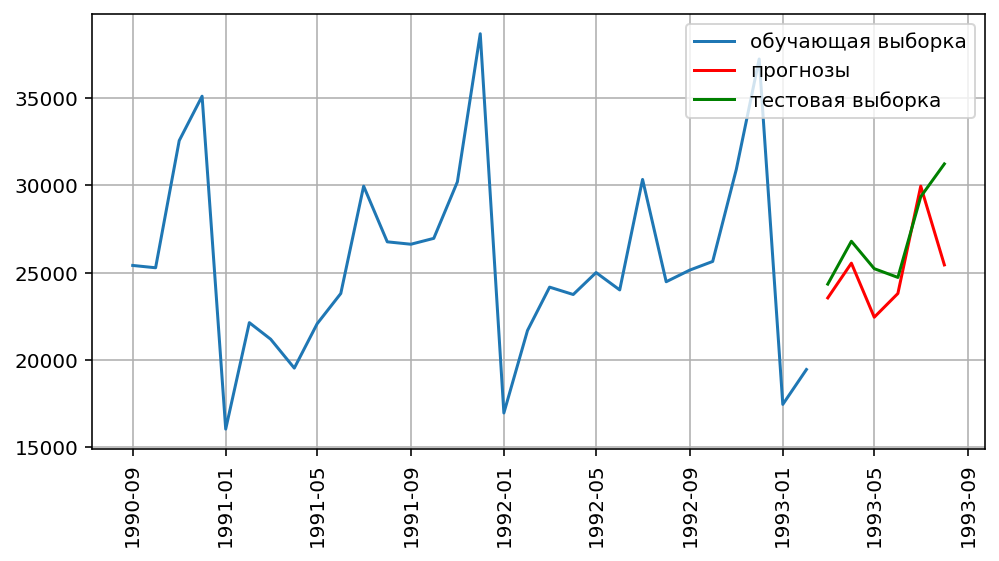

RMSE=2725.442 на 1-й итерации

TRAIN: ['1987-09-01', '1993-08-01'] TEST: ['1993-09-01', '1994-02-01']
Общее кол-во наблюдений: 176
Обучающая выборка: 72
Тестовая выборка: 6


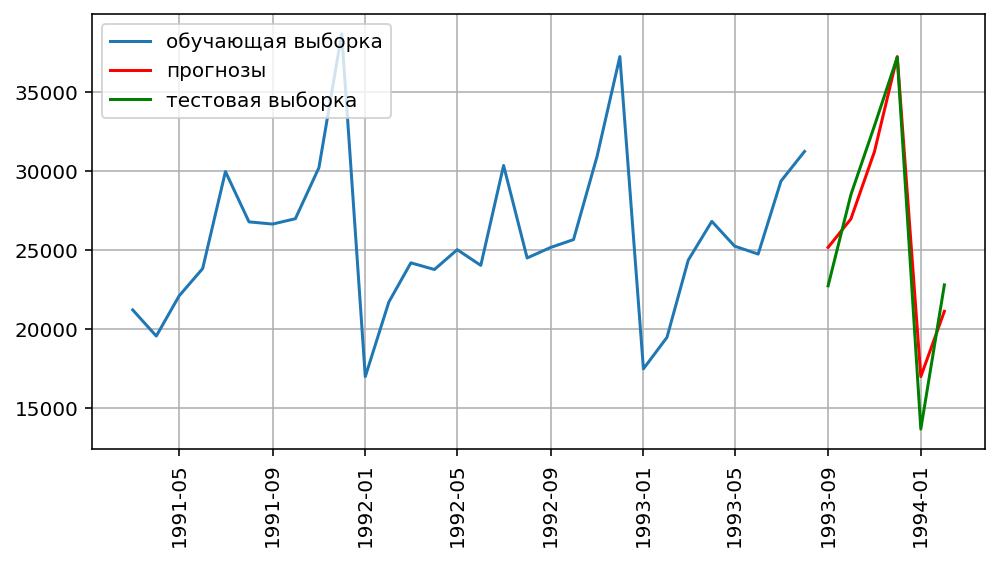

RMSE=2032.659 на 2-й итерации

TRAIN: ['1988-03-01', '1994-02-01'] TEST: ['1994-03-01', '1994-08-01']
Общее кол-во наблюдений: 176
Обучающая выборка: 72
Тестовая выборка: 6


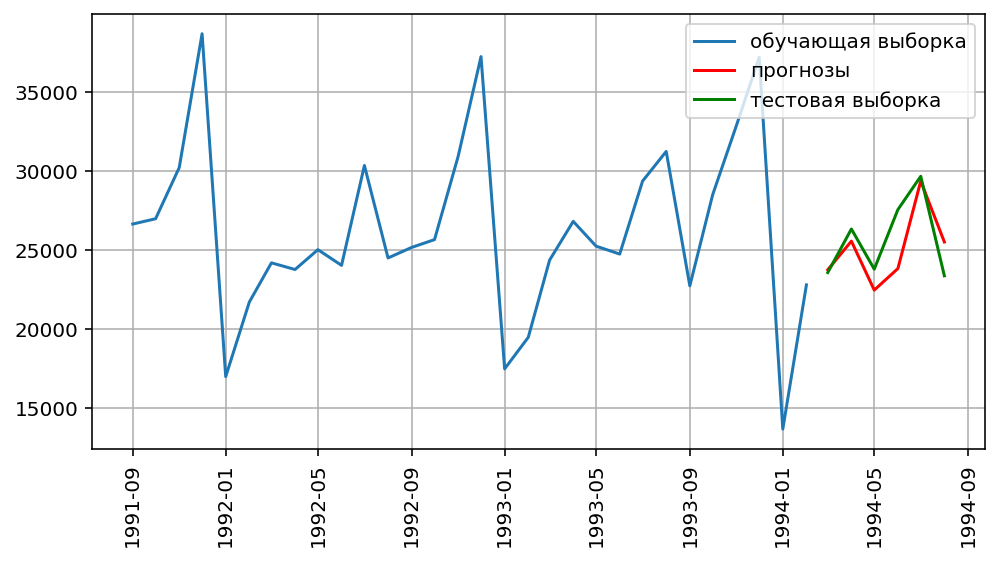

RMSE=1871.080 на 3-й итерации

Усредненное значение RMSE=2209.727


In [14]:
# применяем перекрестную проверку скользящим окном
timeseries_cv(wine_data, y_wine_data, ctbst_model, 
              last_n_train=30, max_train_size=72, 
              test_size=6, n_splits=3, gap=0)

-------------------------------------
TRAIN: ['2016-08-24', '2016-08-29'] TEST: ['2016-08-30', '2016-09-02']

Общее кол-во наблюдений: 10
Обучающий набор: 6
Тестовый набор: 4

Защита:

Date_Create
2016-08-24   2250000.00000
2016-08-25   1960000.00000
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-28   1550000.00000
2016-08-29   2330000.00000
2016-08-30             NaN
2016-08-31             NaN
2016-09-01             NaN
2016-09-02             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-24            NaN           NaN            NaN            NaN
2016-08-25            NaN           NaN  2250000.00000  2250000.00000
2016-08-26            NaN           NaN  2105000.00000  2105000.00000
2016-08-27            NaN           NaN  2053333.33333  2053333.33333
2016-08-28  2250000.00000           NaN  1965000.00000  1965000.0

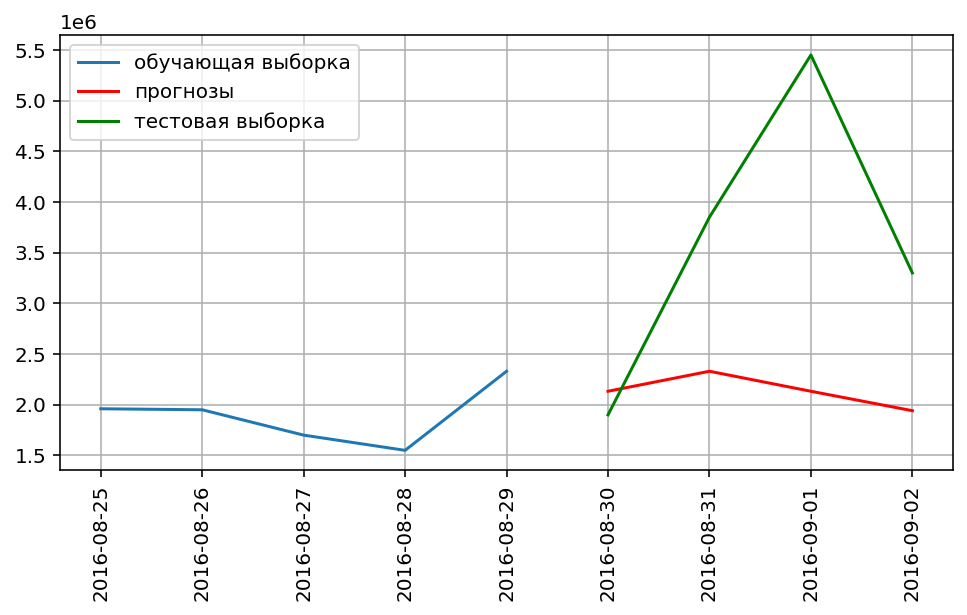

-------------------------------------
TRAIN: ['2016-08-28', '2016-09-02'] TEST: ['2016-09-03', '2016-09-06']

Общее кол-во наблюдений: 10
Обучающий набор: 6
Тестовый набор: 4

Защита:

Date_Create
2016-08-28   1550000.00000
2016-08-29   2330000.00000
2016-08-30   1900000.00000
2016-08-31   3850000.00000
2016-09-01   5450000.00000
2016-09-02   3300000.00000
2016-09-03             NaN
2016-09-04             NaN
2016-09-05             NaN
2016-09-06             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-28            NaN           NaN            NaN            NaN
2016-08-29            NaN           NaN  1550000.00000  1550000.00000
2016-08-30            NaN           NaN  1940000.00000  1940000.00000
2016-08-31            NaN           NaN  1926666.66667  1926666.66667
2016-09-01  1550000.00000           NaN  2407500.00000  2407500.0

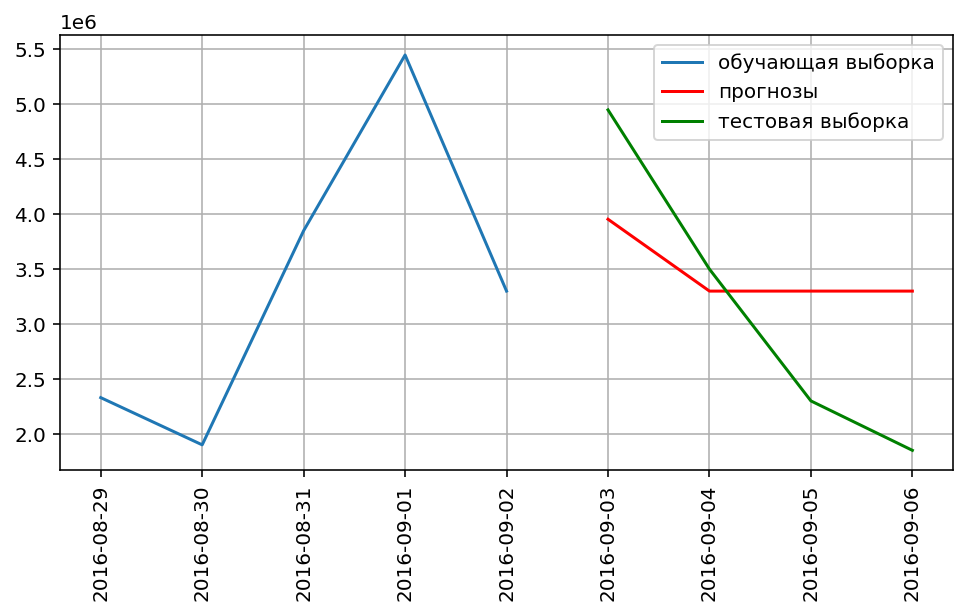

-------------------------------------
TRAIN: ['2016-09-01', '2016-09-06'] TEST: ['2016-09-07', '2016-09-10']

Общее кол-во наблюдений: 10
Обучающий набор: 6
Тестовый набор: 4

Защита:

Date_Create
2016-09-01   5450000.00000
2016-09-02   3300000.00000
2016-09-03   4950000.00000
2016-09-04   3500000.00000
2016-09-05   2300000.00000
2016-09-06   1850000.00000
2016-09-07             NaN
2016-09-08             NaN
2016-09-09             NaN
2016-09-10             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-09-01            NaN           NaN            NaN            NaN
2016-09-02            NaN           NaN  5450000.00000  5450000.00000
2016-09-03            NaN           NaN  4375000.00000  4375000.00000
2016-09-04            NaN           NaN  4566666.66667  4566666.66667
2016-09-05  5450000.00000           NaN  4300000.00000  4300000.0

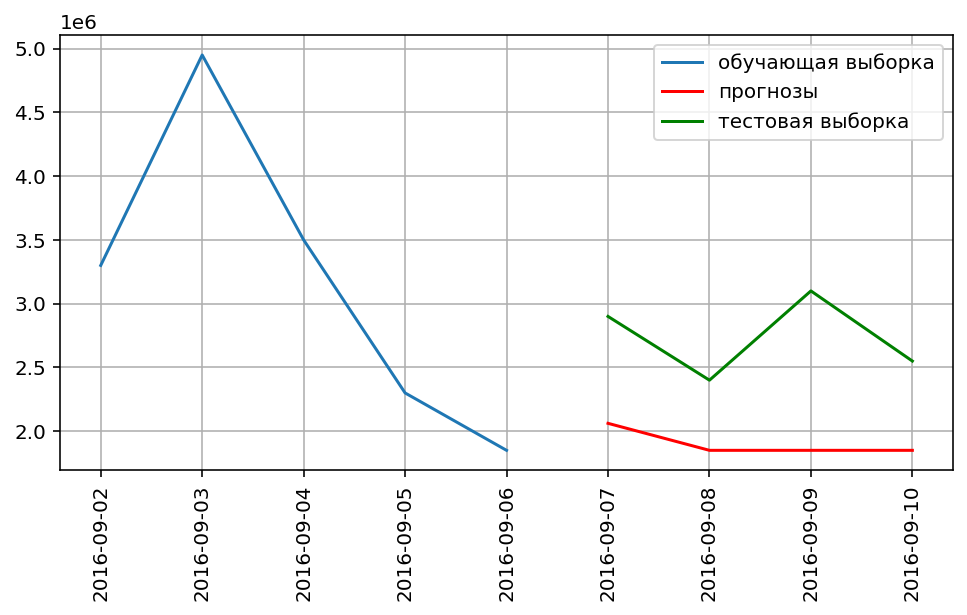

Среднее значение RMSE=1280426.711

Список признаков:
['Lag_4', 'Lag_5', 'Moving_mean_4', 'Moving_mean_5']


In [15]:
# применяем функцию перекрестной проверки скользящим
# окном с формированием скользящих статистик и лагов
# на каждой итерации
timeseries_cv_with_lags_and_moving_stats(
    flat_data, y_flat_data, model=ctbst_model,
    lags_range=range(4, 6),  
    moving_stats_range=range(4, 6),
    aggfunc='mean', max_train_size=6, 
    test_size=4, n_splits=3)

-------------------------------------
TRAIN: ['1987-03-01', '1993-02-01'] TEST: ['1993-03-01', '1993-08-01']

Общее кол-во наблюдений: 78
Обучающий набор: 72
Тестовый набор: 6

RMSE=2302.505 на 1-й итерации



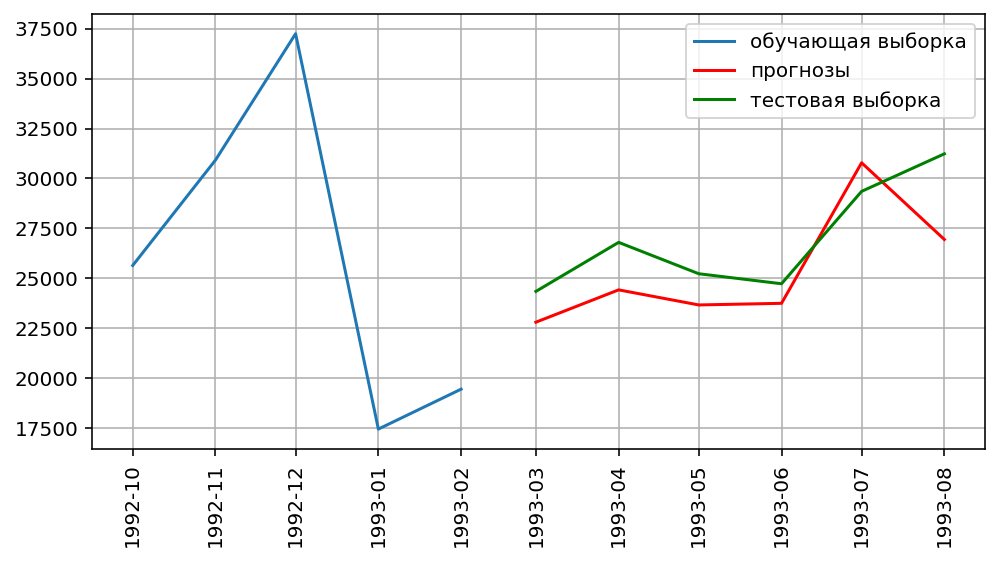

-------------------------------------
TRAIN: ['1987-09-01', '1993-08-01'] TEST: ['1993-09-01', '1994-02-01']

Общее кол-во наблюдений: 78
Обучающий набор: 72
Тестовый набор: 6

RMSE=2431.464 на 2-й итерации



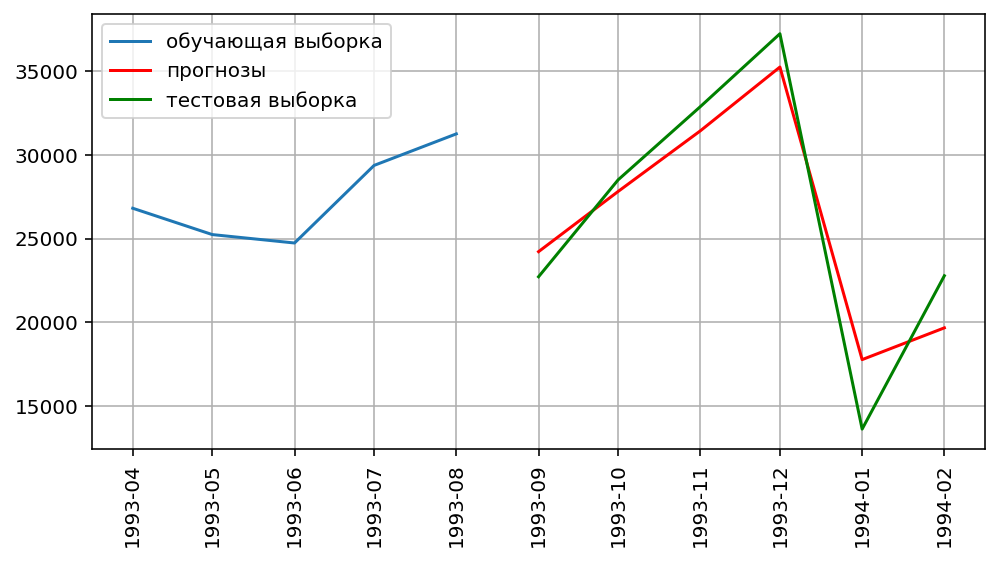

-------------------------------------
TRAIN: ['1988-03-01', '1994-02-01'] TEST: ['1994-03-01', '1994-08-01']

Общее кол-во наблюдений: 78
Обучающий набор: 72
Тестовый набор: 6

RMSE=2703.726 на 3-й итерации



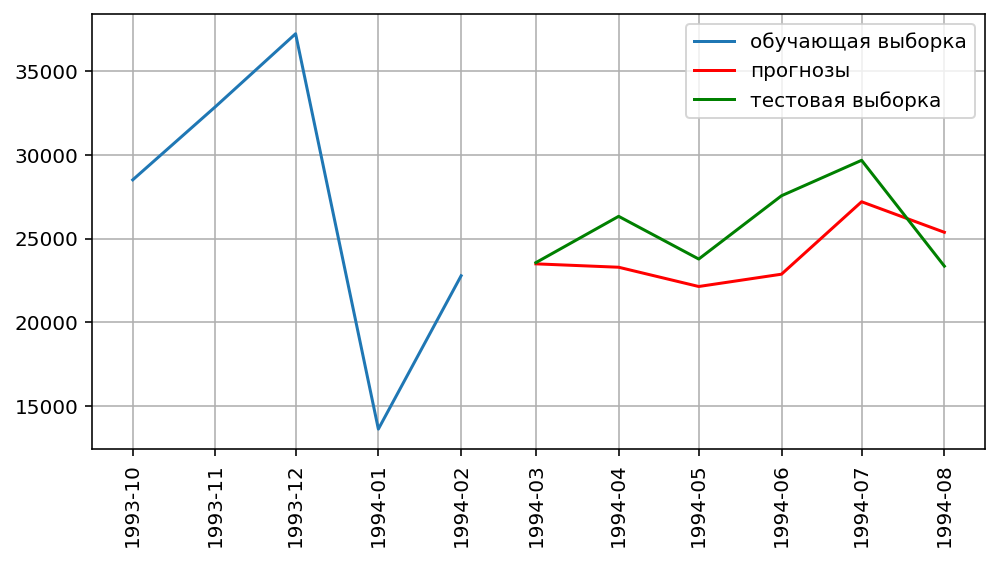

Среднее значение RMSE=2479.232


In [16]:
# применяем функцию перекрестной проверки скользящим
# окном с формированием скользящих статистик и лагов
# на каждой итерации
timeseries_cv_with_lags_and_moving_stats(
    wine_data, y_wine_data, model=ctbst_model,
    lags_range=list(range(6, 11, 2)),  
    moving_stats_range=[6, 8],
    print_features=False,  aggfunc='mean',
    max_train_size=72, test_size=6, n_splits=3)

In [17]:
# фиксируем размер гэпа
expand_gap_cv = TimeSeriesSplit(n_splits=3, test_size=4, gap=2)

# взглянем на индексы наблюдений, попавших в обучающий
# и тестовый наборы, по каждой из 3 итераций
for train_index, test_index in expand_gap_cv.split(flat_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = (flat_data.iloc[train_index], 
                       flat_data.iloc[test_index])
    y_train, y_test = (y_flat_data.iloc[train_index], 
                       y_flat_data.iloc[test_index])
    print("Общее кол-во наблюдений: %d" % len(flat_data))
    print("Обучающая выборка: %d" % len(X_train))
    print("Тестовая выборка: %d" % len(X_test))
    print("")

TRAIN: [0 1 2 3 4 5] TEST: [ 8  9 10 11]
Общее кол-во наблюдений: 20
Обучающая выборка: 6
Тестовая выборка: 4

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [12 13 14 15]
Общее кол-во наблюдений: 20
Обучающая выборка: 10
Тестовая выборка: 4

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [16 17 18 19]
Общее кол-во наблюдений: 20
Обучающая выборка: 14
Тестовая выборка: 4



In [18]:
# фиксируем размер гэпа
sliding_gap_cv = TimeSeriesSplit(n_splits=3, max_train_size=5, 
                                 test_size=4, gap=2)

# взглянем на индексы наблюдений, попавших в обучающую
# и тестовую выборки, по каждой из 3 итераций
for train_index, test_index in sliding_gap_cv.split(flat_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = (flat_data.iloc[train_index], 
                       flat_data.iloc[test_index])
    y_train, y_test = (y_flat_data.iloc[train_index], 
                       y_flat_data.iloc[test_index])
    print("Общее кол-во наблюдений: %d" % len(flat_data))
    print("Обучающая выборка: %d" % len(X_train))
    print("Тестовая выборка: %d" % len(X_test))
    print("")

TRAIN: [1 2 3 4 5] TEST: [ 8  9 10 11]
Общее кол-во наблюдений: 20
Обучающая выборка: 5
Тестовая выборка: 4

TRAIN: [5 6 7 8 9] TEST: [12 13 14 15]
Общее кол-во наблюдений: 20
Обучающая выборка: 5
Тестовая выборка: 4

TRAIN: [ 9 10 11 12 13] TEST: [16 17 18 19]
Общее кол-во наблюдений: 20
Обучающая выборка: 5
Тестовая выборка: 4



-------------------------------------
TRAIN: ['2016-08-22', '2016-08-27'] TEST: ['2016-08-30', '2016-09-02']

Общее кол-во наблюдений: 10
Обучающий набор: 6
Тестовый набор: 4

Защита:

Date_Create
2016-08-22   1450000.00000
2016-08-23   1650000.00000
2016-08-24   2250000.00000
2016-08-25   1960000.00000
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-30             NaN
2016-08-31             NaN
2016-09-01             NaN
2016-09-02             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-22            NaN           NaN            NaN            NaN
2016-08-23            NaN           NaN  1450000.00000  1450000.00000
2016-08-24            NaN           NaN  1550000.00000  1550000.00000
2016-08-25            NaN           NaN  1783333.33333  1783333.33333
2016-08-26  1450000.00000           NaN  1827500.00000  1827500.0

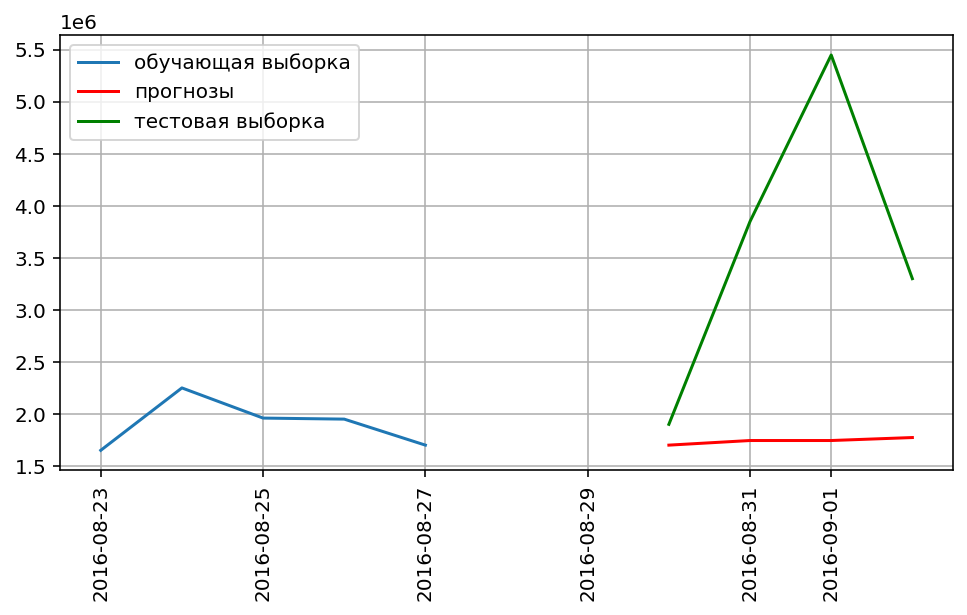

-------------------------------------
TRAIN: ['2016-08-22', '2016-08-31'] TEST: ['2016-09-03', '2016-09-06']

Общее кол-во наблюдений: 14
Обучающий набор: 10
Тестовый набор: 4

Защита:

Date_Create
2016-08-22   1450000.00000
2016-08-23   1650000.00000
2016-08-24   2250000.00000
2016-08-25   1960000.00000
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-28   1550000.00000
2016-08-29   2330000.00000
2016-08-30   1900000.00000
2016-08-31   3850000.00000
2016-09-03             NaN
2016-09-04             NaN
2016-09-05             NaN
2016-09-06             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-22            NaN           NaN            NaN            NaN
2016-08-23            NaN           NaN  1450000.00000  1450000.00000
2016-08-24            NaN           NaN  1550000.00000  1550000.00000
2016-08-25            NaN 

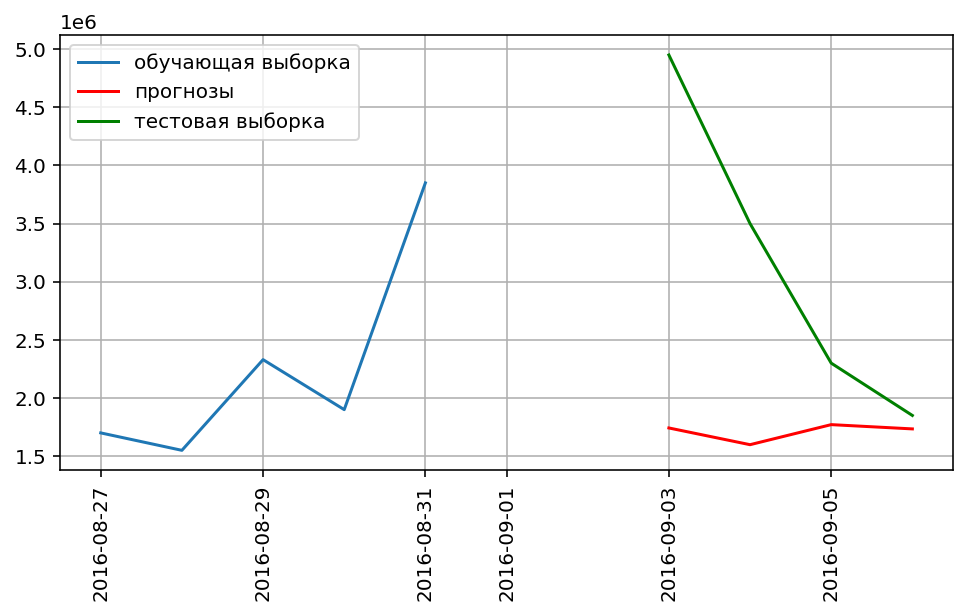

-------------------------------------
TRAIN: ['2016-08-22', '2016-09-04'] TEST: ['2016-09-07', '2016-09-10']

Общее кол-во наблюдений: 18
Обучающий набор: 14
Тестовый набор: 4

Защита:

Date_Create
2016-08-22   1450000.00000
2016-08-23   1650000.00000
2016-08-24   2250000.00000
2016-08-25   1960000.00000
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-28   1550000.00000
2016-08-29   2330000.00000
2016-08-30   1900000.00000
2016-08-31   3850000.00000
2016-09-01   5450000.00000
2016-09-02   3300000.00000
2016-09-03   4950000.00000
2016-09-04   3500000.00000
2016-09-07             NaN
2016-09-08             NaN
2016-09-09             NaN
2016-09-10             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-22            NaN           NaN            NaN            NaN
2016-08-23            NaN           NaN  1450000.00000  14

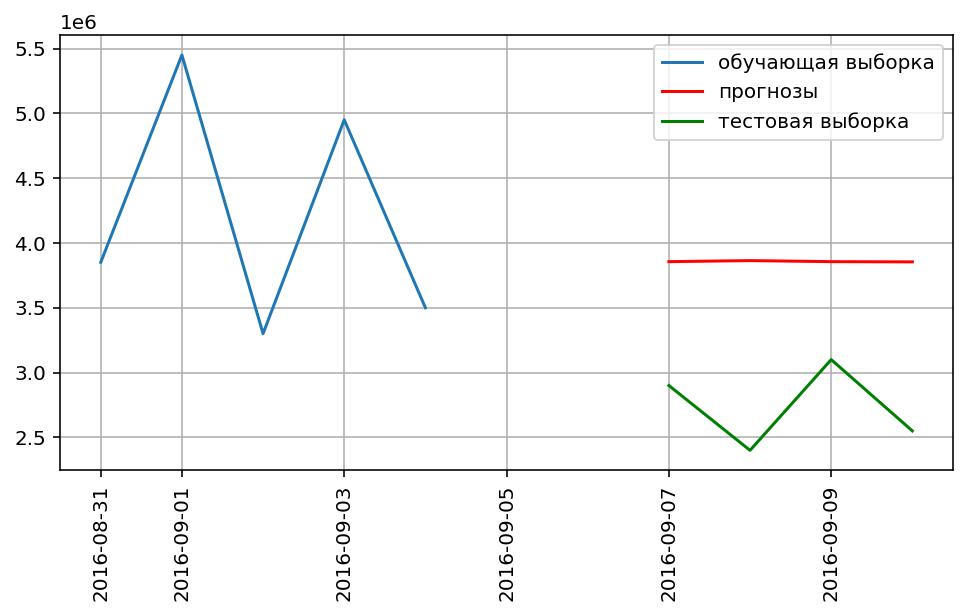

Среднее значение RMSE=1767959.113

Список признаков:
['Lag_4', 'Lag_5', 'Moving_mean_4', 'Moving_mean_5']


In [19]:
# применяем функцию перекрестной проверки расширяющимся
# окном c гэпом, формируем скользящие статистики и лаги
# на каждой итерации
timeseries_cv_with_lags_and_moving_stats(
    flat_data, y_flat_data, model=ctbst_model,
    lags_range=range(4, 6),  
    moving_stats_range=range(4, 6),
    aggfunc='mean', test_size=4, n_splits=3, gap=2)

-------------------------------------
TRAIN: ['2016-08-22', '2016-08-27'] TEST: ['2016-08-30', '2016-09-02']

Общее кол-во наблюдений: 10
Обучающий набор: 6
Тестовый набор: 4

Защита:

Date_Create
2016-08-22   1450000.00000
2016-08-23   1650000.00000
2016-08-24   2250000.00000
2016-08-25   1960000.00000
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-30             NaN
2016-08-31             NaN
2016-09-01             NaN
2016-09-02             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-22            NaN           NaN            NaN            NaN
2016-08-23            NaN           NaN  1450000.00000  1450000.00000
2016-08-24            NaN           NaN  1550000.00000  1550000.00000
2016-08-25            NaN           NaN  1783333.33333  1783333.33333
2016-08-26  1450000.00000           NaN  1827500.00000  1827500.0

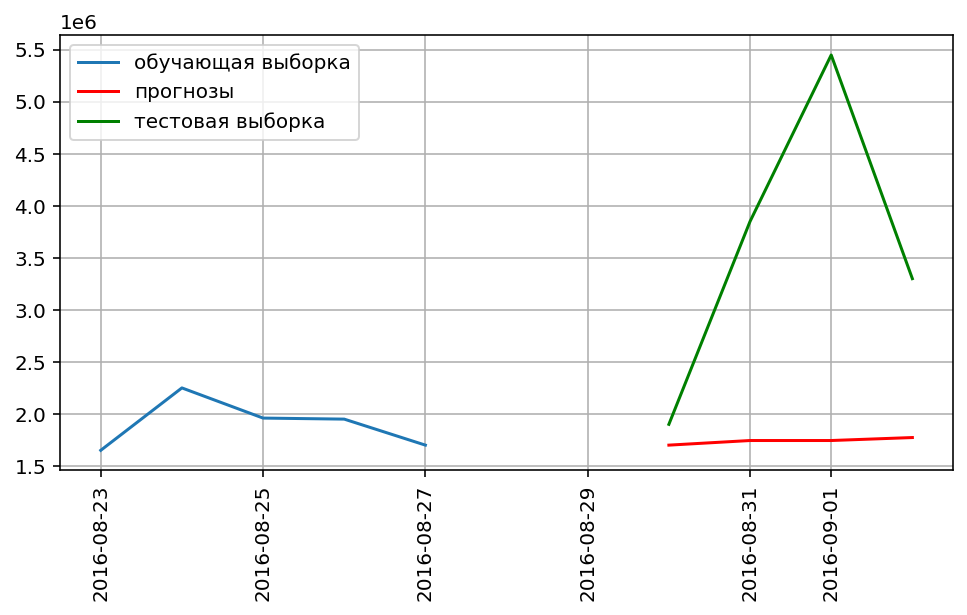

-------------------------------------
TRAIN: ['2016-08-26', '2016-08-31'] TEST: ['2016-09-03', '2016-09-06']

Общее кол-во наблюдений: 10
Обучающий набор: 6
Тестовый набор: 4

Защита:

Date_Create
2016-08-26   1950000.00000
2016-08-27   1700000.00000
2016-08-28   1550000.00000
2016-08-29   2330000.00000
2016-08-30   1900000.00000
2016-08-31   3850000.00000
2016-09-03             NaN
2016-09-04             NaN
2016-09-05             NaN
2016-09-06             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-26            NaN           NaN            NaN            NaN
2016-08-27            NaN           NaN  1950000.00000  1950000.00000
2016-08-28            NaN           NaN  1825000.00000  1825000.00000
2016-08-29            NaN           NaN  1733333.33333  1733333.33333
2016-08-30  1950000.00000           NaN  1882500.00000  1882500.0

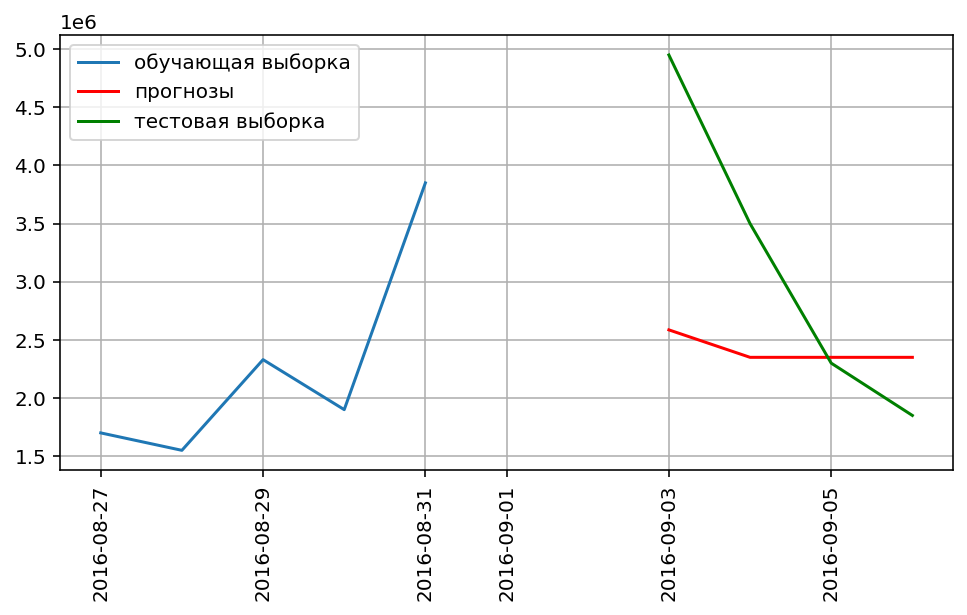

-------------------------------------
TRAIN: ['2016-08-30', '2016-09-04'] TEST: ['2016-09-07', '2016-09-10']

Общее кол-во наблюдений: 10
Обучающий набор: 6
Тестовый набор: 4

Защита:

Date_Create
2016-08-30   1900000.00000
2016-08-31   3850000.00000
2016-09-01   5450000.00000
2016-09-02   3300000.00000
2016-09-03   4950000.00000
2016-09-04   3500000.00000
2016-09-07             NaN
2016-09-08             NaN
2016-09-09             NaN
2016-09-10             NaN
Name: Value_abs, dtype: float64

Доб. признаки:
                    Lag_4         Lag_5  Moving_mean_4  Moving_mean_5
Date_Create                                                          
2016-08-30            NaN           NaN            NaN            NaN
2016-08-31            NaN           NaN  1900000.00000  1900000.00000
2016-09-01            NaN           NaN  2875000.00000  2875000.00000
2016-09-02            NaN           NaN  3733333.33333  3733333.33333
2016-09-03  1900000.00000           NaN  3625000.00000  3625000.0

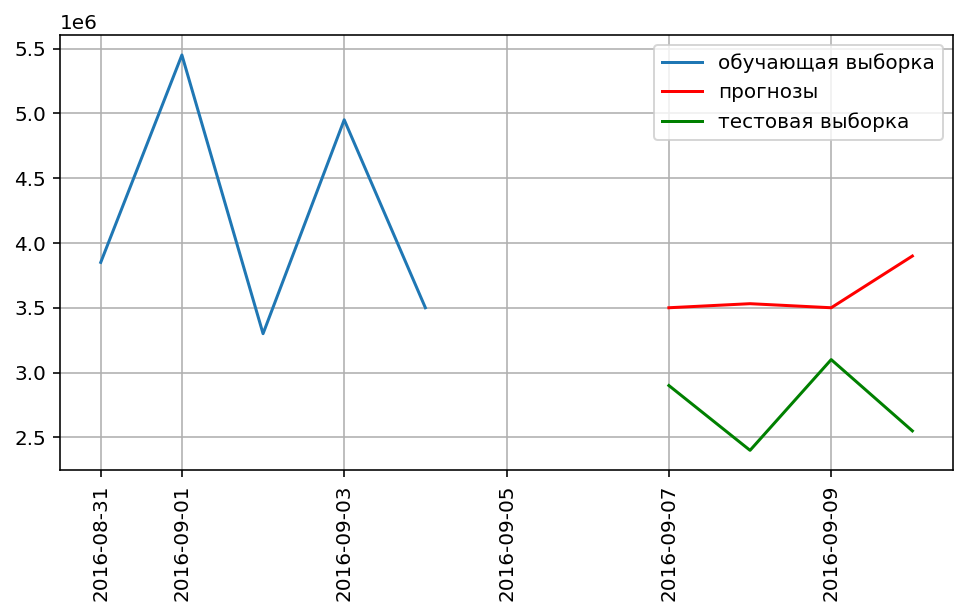

Среднее значение RMSE=1518483.681

Список признаков:
['Lag_4', 'Lag_5', 'Moving_mean_4', 'Moving_mean_5']


In [20]:
# применяем функцию перекрестной проверки скользящим
# окном c гэпом, формируем скользящие статистики и лаги
# на каждой итерации
timeseries_cv_with_lags_and_moving_stats(
    flat_data, y_flat_data, model=ctbst_model,
    lags_range=range(4, 6),  
    moving_stats_range=range(4, 6), aggfunc='mean', 
    max_train_size=6, test_size=4, n_splits=3, gap=2)